<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/WATERMILON/dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparative Analysis of Data Analysis Libraries - DASK
<a target="_blank" href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/WATERMILON/dask.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In this assignment, we aim to analyze a substantial dataset, specifically the [UK Property Price data from 1995 to April 2023](https://www.kaggle.com/datasets/willianoliveiragibin/uk-property-price-data-1995-2023-04). Our primary focus is on employing Modin as the primary tool for data cleaning, data visualization, and addressing various analytical questions. The objective is to demonstrate the efficiency and effectiveness of Dask in handling large datasets when compared to other libraries.

## Group Information
**Group Name**: WATERMILON

**Group Members:**

| Name                | Matrix Number | Task   |
| ------------------- | ------------- | ------ |
| NG ZI XING          | A21EC0213     | Modin  |
| LOO ZHI YUAN        | A21EC0197     | Vaex   |
| YEW RUI XIANG       | A21EC0149     | Dask   |
| SAM CHIA YUN        | A21EC0127     | Vaex   |

## About the Data

The dataset under consideration provides comprehensive information on property sales in England and Wales. Sourced from the UK government's HM Land Registry, it furnishes valuable insights into property transactions, encompassing sale prices, locations, and property types. Analysts, researchers, and businesses can leverage this dataset to comprehend market trends, property valuations, and identify investment opportunities within the real estate sector of England and Wales.

### Columns Explanation

- **Postcode:** The postal code denoting the property's location.
- **PAON (Primary Addressable Object Name):** Typically the house number or name.
- **SAON (Secondary Addressable Object Name):** Additional information if the building is divided into flats or sub-buildings.
- **Street:** The street name where the property is situated.
- **Locality:** Supplementary locality information.
- **Town/City:** The town or city where the property is positioned.
- **District:** The district in which the property is situated.
- **County:** The county where the property is located.
- **Price Paid:** The amount for which the property was sold.

This information will serve as the foundation for our analysis, showcasing the prowess of Modin in managing extensive datasets in comparison to other libraries.

## Downloading the Dataset

**Upload Kaggle.json File:**

> Please upload your `kaggle.json` file, which contains your username and API key.


In [ ]:
# Upload kaggle.json API token, and download / unzip csv
from google.colab import files

files.upload()
pass

Saving kaggle.json to kaggle.json


**Download the Data:**

Let's initiate the process by acquiring the dataset.


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d willianoliveiragibin/uk-property-price-data-1995-2023-04

100% 1.36G/1.36G [00:15<00:00, 62.9MB/s]
100% 1.36G/1.36G [00:15<00:00, 96.5MB/s]


In [ ]:
!unzip uk-property-price-data-1995-2023-04.zip

Archive:  uk-property-price-data-1995-2023-04.zip
  inflating: 202304.csv              


## Data Preparation and Cleaning
In the process of preparing and cleaning the data, the following steps will be undertaken:

- **Related Package Loading:**
  Including upgrade pandas, dask and modin

- **Dataset Loading:**
  Load the dataset to initiate the data preparation phase.

- **Data Quality Enhancement:**
  Address issues related to missing, incorrect, and invalid data to enhance the overall quality of the dataset.

- **Additional Data Manipulation:**
  Execute supplementary steps such as date parsing, column creation

In [ ]:
!pip install "dask[complete]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


Import the required packages and configure the settings the number of workers to 2.


In [ ]:
import numpy as np
import os
import pandas as pd
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from dask.distributed import Client

client = Client(n_workers = 2, threads_per_worker = 2)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:32841
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43969'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44247'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33217', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33217
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58638
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41813', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41813
INFO:distributed.core:Sta

In [ ]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 4,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32841,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:41813,Total threads: 2
Dashboard: http://127.0.0.1:46037/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:43969,


Load the .csv file using the read_csv function. Since the CSV file lacks a header column, set the header parameter to None. Manually assign column names to address this issue. The datatypes of the columns PAON and SAON have mixed/ambiguous datatypes, manually set those columns datatypes as object to prevent issues when accessing dataframe.

In [ ]:
%%time

colnames=['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 'postcode', 'Property_Type',
          'Old/New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County', 'PPDCategory_Type','Record_Status - monthly_file_only']
dtypes = {'PAON': 'object', 'SAON': 'object', 'postcode': 'str', 'Property_Type': 'str', 'Duration': 'str', 'PAON': 'str', 'Street': 'str', 'Town/City': 'str',
          'District': 'str', 'County': 'str', 'Old/New': 'str', 'PPDCategory_Type': 'str'}

data = dd.read_csv("/content/202304.csv", dtype={'PAON': 'object', 'SAON': 'object', }, header = None, names = colnames, parse_dates = ["Date_of_Transfer"])

CPU times: user 23.2 ms, sys: 5.13 ms, total: 28.3 ms
Wall time: 50.5 ms


In [ ]:
data.head()

,Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07,MK15 9HP,D,N,F,31,NaN,ALDRICH DRIVE,WILLEN,MILTON KEYNES,MILTON KEYNES,MILTON KEYNES,A,A
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,SR6 0AQ,T,N,F,50,NaN,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR,A,A
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,CO6 1SQ,T,N,F,19,NaN,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX,A,A
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,B90 4TG,T,N,F,37,NaN,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,A
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,DY5 1SA,S,N,F,59,NaN,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS,A,A


Repartitions the dask dataframe to 128 partitions.

In [ ]:
data.npartitions

77

In [ ]:
data = data.repartition(npartitions=128)

Executing `data.info()` for dask dataframe only provides the number of columns which is 16 and the number of columns based on existing datatypes. It does not provided more specified info about the dataframe unlike the pandas dataframe.

In [ ]:
%%time
data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, Transaction_unique_identifier to Record_Status - monthly_file_only
dtypes: datetime64[ns](1), object(14), int64(1)CPU times: user 2.93 ms, sys: 0 ns, total: 2.93 ms
Wall time: 4.36 ms


In [ ]:
%%time
data = data.drop(["Transaction_unique_identifier", "Record_Status - monthly_file_only"], axis = 1)

CPU times: user 9.71 ms, sys: 0 ns, total: 9.71 ms
Wall time: 11.6 ms


In [ ]:
data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 14 entries, price to PPDCategory_Type
dtypes: datetime64[ns](1), object(12), int64(1)

Considering that nearly 90% of the SAON column is empty, it is prudent to drop this column. Additionally, the Locality column contains redundant information with other location-related rows, leading to the decision to remove it. To address null values in other columns, a straightforward approach is to replace them with a pseudo-class, denoted as "UNK." For numeric null columns like PAON, the null values will be replaced with zero.


Dask Dataframe perform lazily as most of the operations on a Dask DataFrame build up a task graph rather than immediately executing. It required the used of `compute()` function to execute the operations.

In [ ]:
%%time
data.isna().sum().compute() / data.shape[0].compute()

CPU times: user 26 s, sys: 3.17 s, total: 29.2 s
Wall time: 6min 23s


price               0.000000
Date_of_Transfer    0.000000
postcode            0.001626
Property_Type       0.000000
Old/New             0.000000
Duration            0.000000
PAON                0.000148
SAON                0.882380
Street              0.015835
Locality            0.356690
Town/City           0.000000
District            0.000000
County              0.000000
PPDCategory_Type    0.000000
dtype: float64

Dask dataframe does not have `inplace` attribute in most of the functions including `drop()` function. It must explicitly assigned the original dataframe to the returned dataframe.

In [ ]:
%%time
data = data.drop(["SAON", "Locality"], axis = 1)

CPU times: user 6.87 ms, sys: 64 µs, total: 6.93 ms
Wall time: 7.41 ms


In [ ]:
%%time
data = data.fillna({"postcode" : "UNK", "PAON" : 0, "Street" : "UNK"})

CPU times: user 10.5 ms, sys: 1.05 ms, total: 11.6 ms
Wall time: 12.2 ms


Review the cleaning results.

In [ ]:
%%time
data.isna().sum().compute() / data.shape[0].compute()

CPU times: user 31 s, sys: 3.74 s, total: 34.7 s
Wall time: 7min 13s


price               0.0
Date_of_Transfer    0.0
postcode            0.0
Property_Type       0.0
Old/New             0.0
Duration            0.0
PAON                0.0
Street              0.0
Town/City           0.0
District            0.0
County              0.0
PPDCategory_Type    0.0
dtype: float64

Convert all object columns to string type.

In [ ]:
# %%time
# colnames = ["postcode", "Property_Type", "Duration", "PAON", "Street", "Town/City", "District", "County", "Old/New", "PPDCategory_Type"]

# data[colnames] = data.astype( { col : str for col in colnames} )[colnames]

Convert the `Date of Transfer` column into two separate columns for the year and month. Exclude detailed information beyond the month, as it is not required for our analysis.


In [ ]:
data["year"] = data["Date_of_Transfer"].dt.year
data["month"] = data["Date_of_Transfer"].dt.month

data = data.drop("Date_of_Transfer", axis = 1)

In [ ]:
data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 13 entries, price to month
dtypes: object(10), int64(3)

## Exploratory Analysis and Visualization

During this session, we will conduct exploratory data analysis by delving into the components or values of specific columns. Our aim is to examine general relationships between certain columns and property prices, extracting insights that may lead to interesting questions for further exploration in the next session.


We observe that the mean property price is approximately \$ 218,000, while the median is \$ 150,000. This notable difference suggests a potential right-skewed distribution in the price data. This leads us to our initial question: What is the coefficient of skewness for the property prices?


In [ ]:
%%time
data.describe().compute()

CPU times: user 17.6 s, sys: 1.84 s, total: 19.5 s
Wall time: 3min 25s


,price,year,month
count,2.827623e+07,2.827623e+07,2.827623e+07
mean,2.181305e+05,2.008148e+03,6.768895e+00
std,8.688524e+05,8.178055e+00,3.353060e+00
min,1.000000e+00,1.995000e+03,1.000000e+00
25%,1.220000e+05,2.001000e+03,5.000000e+00
50%,1.895000e+05,2.007000e+03,8.000000e+00
75%,5.200000e+05,2.016000e+03,1.100000e+01
max,5.943000e+08,2.023000e+03,1.200000e+01


Using `persist()` function to persist a Dask Dataframe in memory. This operation helps avoid redundant computations and allows subsequent computations to reuse the persisted data and improving the efficiency of computations.

In [ ]:
data = data.persist()

As anticipated, the price exhibits a highly right-skewed distribution, indicating the presence of outliers in the right tail.


INFO:distributed.core:Event loop was unresponsive in Scheduler for 12.09s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 12.10s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 12.72s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


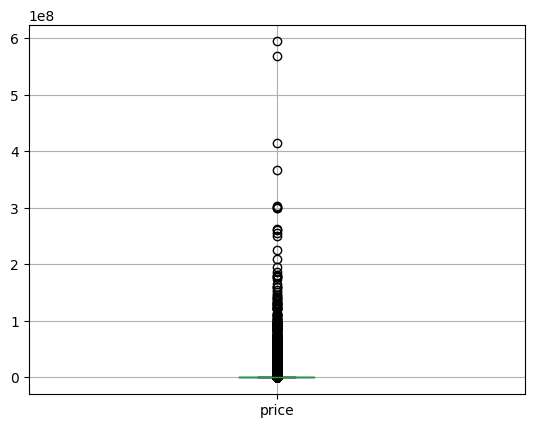

CPU times: user 39.1 s, sys: 7.09 s, total: 46.2 s
Wall time: 4min 46s


In [ ]:
%%time
ddf_sampled = data.sample(frac=0.2, random_state=42)
ddf_sampled = ddf_sampled.persist()
ddf_sampled = ddf_sampled.compute()

ddf_sampled.boxplot(column=["price"])
plt.show()

To ensure data neutrality and avoid regional bias, it is essential to balance the proportion of data from each country. A pie chart visualization reveals a relatively uniform sample distribution across most countries, prompting the question of the extent to which property prices depend on the country. Notably, Greater London stands out with the largest sample size. This leads us to consider exploring property prices specifically in Greater London for further insights.


INFO:distributed.utils_perf:full garbage collection released 169.14 MiB from 3410 reference cycles (threshold: 9.54 MiB)


CPU times: user 5.89 s, sys: 808 ms, total: 6.7 s
Wall time: 1min 1s


<Axes: ylabel='County'>

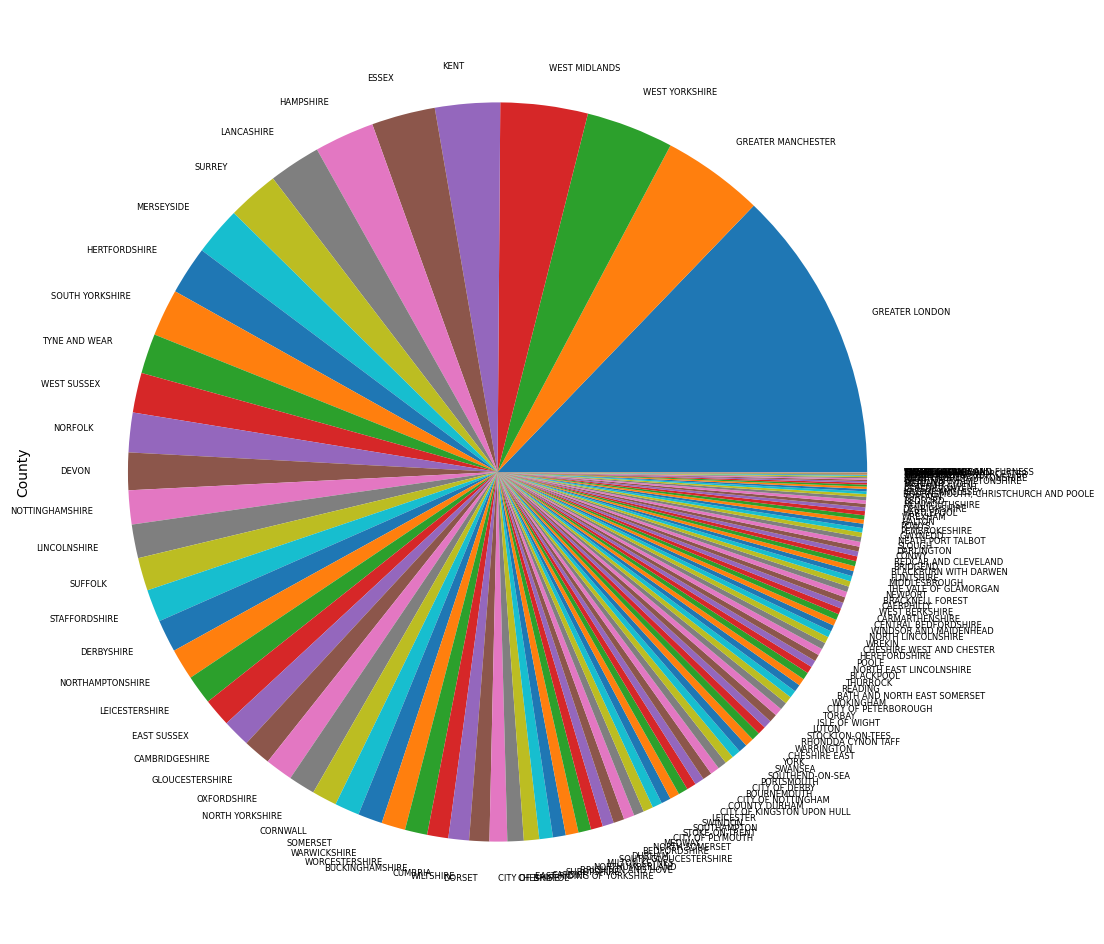

In [ ]:
%%time
ddf_sampled = data["County"].sample(frac = 0.1).value_counts().compute()
ddf_sampled.plot.pie(figsize = (15,12), fontsize = 6);

Recognizing the importance of the number of classes in a column, we have calculated the number of unique values for three columns: Duration, Old/New, and PPDCategory Type. The results reveal that Duration has three classes, while Old/New and PPDCategory_Type each have two classes. The next question to explore is how these classes influence property prices. Given the limited unique values, we can employ a bar chart in the next session to delve into this analysis.


Since `dask.DataFrame.apply()` does not supports columns manipulation in which `axis=0` is unable to specified as its parameter. We use tradition method or for loop to compute number of unique values for those columns.

CPU times: user 13.4 s, sys: 1.72 s, total: 15.1 s
Wall time: 3min 14s


<Axes: >

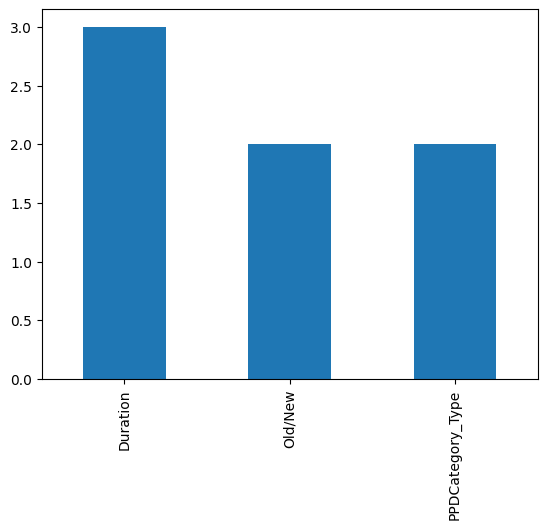

In [ ]:
%%time
columns = ["Duration", "Old/New", "PPDCategory_Type"]
count = {}

for x in columns:
  count[x] = data[x].unique().shape[0].compute()

count = pd.Series(count)
count.plot.bar()

Common sense suggests that property type should significantly influence property prices. To explore this relationship, we can create a box plot of property prices based on different property types. The plot reveals distinct variations in price dispersion among property types. However, to further understand the heights of prices, we will address this aspect in the next section.


CPU times: user 9.46 s, sys: 923 ms, total: 10.4 s
Wall time: 1min 14s


<Axes: title={'center': 'price'}, xlabel='[Property_Type]'>

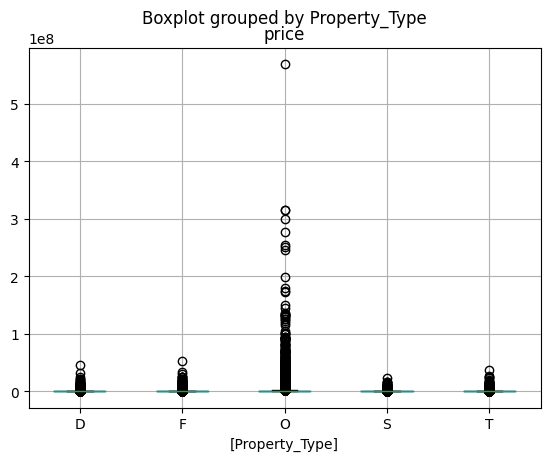

In [ ]:
%%time
ddf_sampled = data[["Property_Type", "price"]].sample(frac = 0.1)
ddf_sampled = ddf_sampled.compute()

ddf_sampled.boxplot(by = "Property_Type")

## Asking and Answering Questions

In this session, the following part will be done:
1. **6 insightful questions about the dataset:**
2. **Answer the questions using Numpy/Pandas computations or by plotting graphs with Matplotlib/Seaborn and sklearn:**
3. **Perform necessary data manipulations based on previous findings:**
  


### To what degree is the price distribution skewed?

> **Solution:** Calculate the coefficient of skewness for property prices.

> **Answer:** Despite an exponential distribution having a skewness of 2, the skewness for property prices is nearly 90 times, indicating a highly right-skewed distribution. This suggests that the median is a more robust estimator than the mean. Furthermore, it implies that property prices globally are not evenly distributed, highlighting a disparity between affluent and less affluent segments of the population.


In [ ]:
%%time

skewness = data["price"].skew()
skewness.compute()

CPU times: user 5.6 s, sys: 675 ms, total: 6.28 s
Wall time: 1min 6s


183.55846728380837

### Does the country where the property is located significantly influence its price?

> **Solution:** Given the diverse presence of countries in the dataset, traditional plotting may not be suitable. Instead, apply mutual information regression to quantify the contribution of country information to the price.

> **Answer:** The mutual information of the country to price is 0.01, indicating a relationship between them, but the influence is not substantial. This suggests that while the country is a factor, it is not the sole determinant of property prices.


In [ ]:
%%time
from sklearn.feature_selection import mutual_info_regression

test_data = data[["County", "price"]].sample(frac=0.1)
test_data = test_data.compute()
mutual_info_regression( np.expand_dims( pd.factorize( test_data["County"] )[0], axis = 1), ddf_sampled["price"])

INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.98s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.99s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


CPU times: user 1min 28s, sys: 2.23 s, total: 1min 30s
Wall time: 2min 33s


array([0.00139404])

In [ ]:
del test_data

### How does the district affect the price and its dispersion in property?

> **Solution:** Generate two charts depicting the mean and standard deviation of property prices for each district. For illustrative purposes, we focus on districts within the Greater London country.

> **Answer:** The trend observed in both charts is quite similar. Districts with higher mean prices also exhibit higher standard deviations. This indicates that in districts with elevated property prices, the disparity in property prices across different properties within the district is more pronounced. The City of London stands out with both the highest property prices and standard deviation.


CPU times: user 5.19 s, sys: 620 ms, total: 5.81 s
Wall time: 1min 4s


array([<Axes: title={'center': '(price, mean)'}, xlabel='District'>,
       <Axes: title={'center': '(price, std)'}, xlabel='District'>],
      dtype=object)

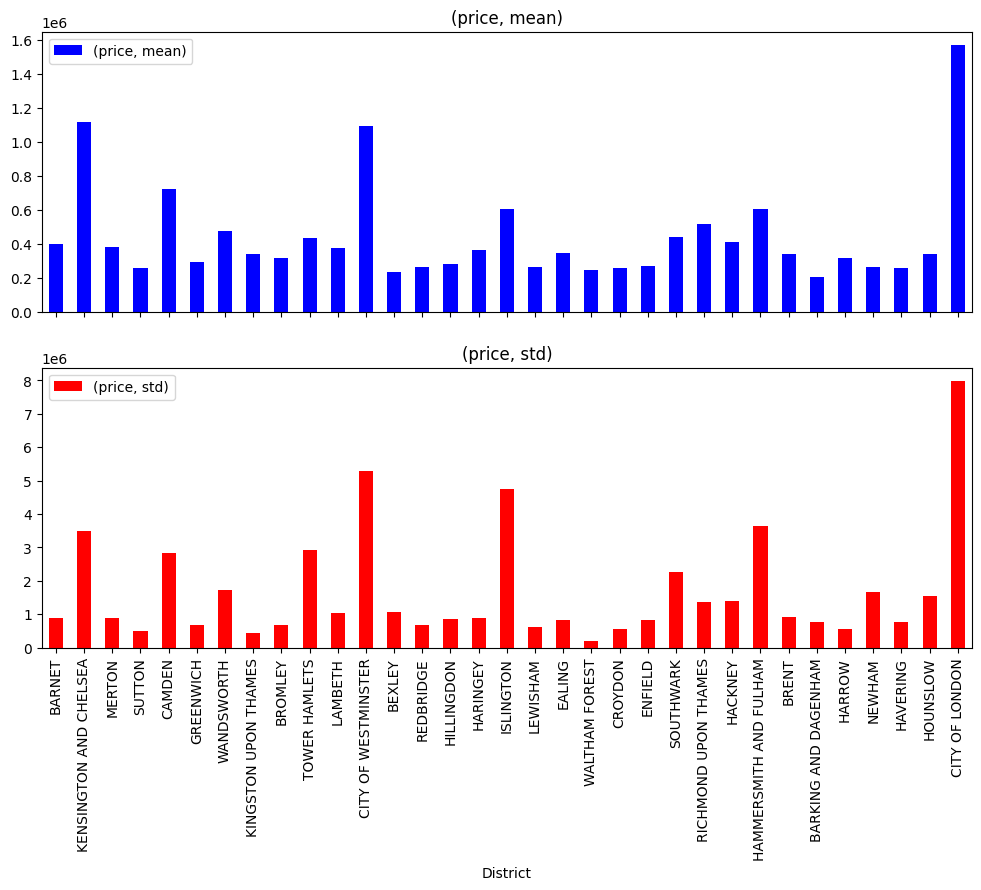

In [ ]:
%%time
test_data = data[["District", "price"]][data["County"] == "GREATER LONDON"]
test_data = test_data.sample(frac = 0.1).groupby("District").agg({"price" : ["mean", "std"]})
test_data = test_data.compute()
test_data.plot.bar(subplots = True, color = ["blue", "red"], figsize = (12, 8))


In [ ]:
del test_data

### How does the combination of PPDCategory_Type and Old/New property status influence property prices?

> **Solution:** Create a visualization by plotting the median property prices against PPDCategory_Type and Old/New.

> **Answer:** An interesting observation is that the price of new properties consistently remains the highest across all property transfer durations.


CPU times: user 6.47 s, sys: 839 ms, total: 7.31 s
Wall time: 1min 15s


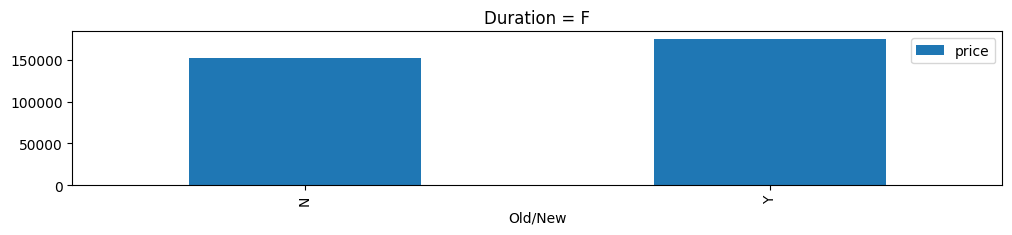

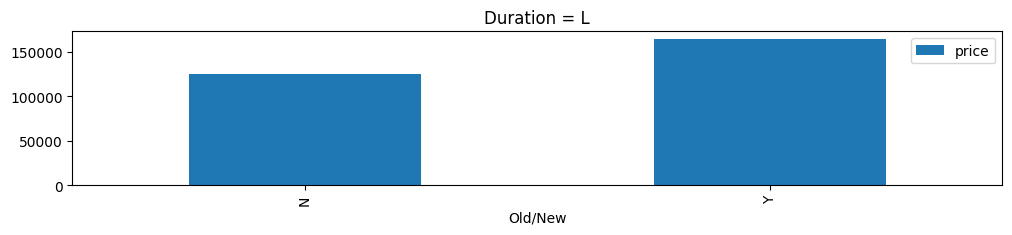

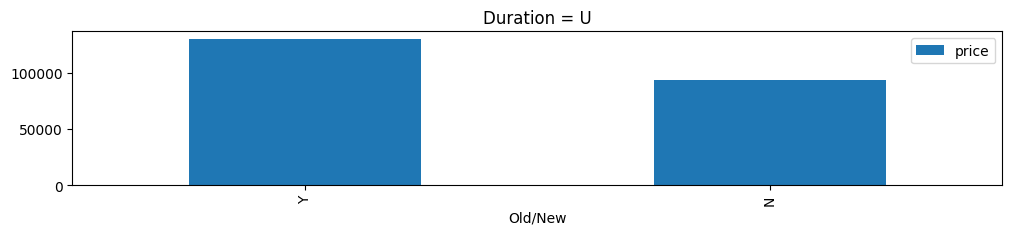

In [ ]:
%%time
test_data = data[["price", "Duration", "Old/New"]].sample(frac = 0.1).groupby(["Duration", "Old/New"]).median()
test_data = test_data.compute()
test_data = test_data.reset_index()

ax = test_data.groupby("Duration").plot( x = "Old/New", y = "price", kind = "bar", figsize = (12, 2))
for title, a in dict(ax).items():
  a.set_title(f"Duration = {title}")

### What is the trend in property prices over time?

> **Solution:** Create a line plot of property prices over time, with each line representing a month.

> **Answer:** The graph illustrates a general upward trend in property prices over time, which is expected. However, the intriguing observation is the fluctuation of prices within the same year, showing increasing dispersion. Before around 2012, most lines followed a similar trend, but the dispersion increased over the years. Some lines exhibited price increases, while others showed decreases within the same year.


CPU times: user 1min, sys: 3.02 s, total: 1min 3s
Wall time: 2min 15s


<Axes: xlabel='year', ylabel='price'>

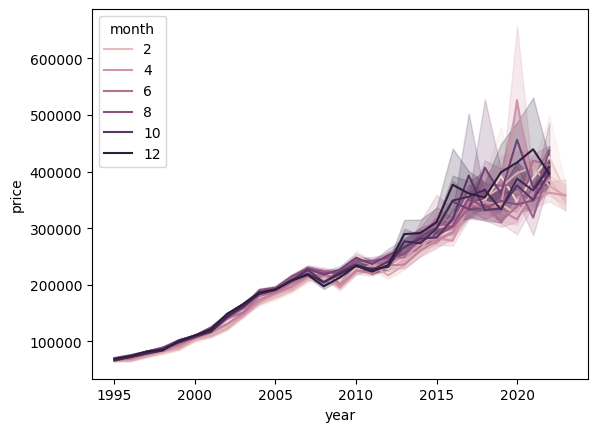

In [ ]:
%%time
sns.lineplot(data = data.sample(frac = 0.1).compute(), x = "year", y = "price", hue = "month")

### How does the price of property vary based on different property types over time?

> **Solution:** Create a line plot of property prices over the years, with each line representing a different property type.

> **Answer:** Upon observation, it is evident that Type O properties consistently command the highest prices throughout most periods, although they also experience notable fluctuations. In contrast, other property types exhibit a smoother and steadily increasing trend over time.


CPU times: user 1min 3s, sys: 3.02 s, total: 1min 6s
Wall time: 2min 19s


<Axes: xlabel='year', ylabel='price'>

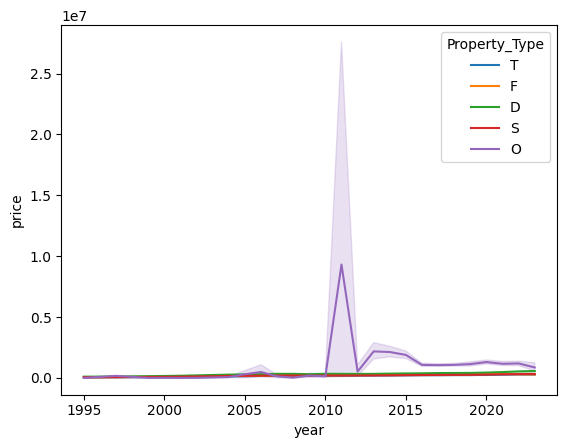

In [ ]:
%%time
sns.lineplot(data = data.sample(frac = 0.1).compute(), x = "year", y = "price", hue = "Property_Type")

## Inferences and Conclusion
Upon analyzing the distribution of property prices, we noticed a significant disparity between the mean (approximately \$218,000) and median (\$150,000), indicating a highly right-skewed distribution. The coefficient of skewness for property prices is nearly 90 times that of an exponential distribution, highlighting the substantial skewness. This suggests that the median is a more robust estimator than the mean, emphasizing the uneven distribution of property prices globally.

When examining the influence of location, we found that the country of property location displayed a relationship with prices, as measured by mutual information regression. However, this influence was not considered substantial, implying that other factors significantly contribute to property prices. Further exploration into districts within the Greater London area revealed that higher mean prices correlated with higher standard deviations, indicating greater disparity in property prices within districts with elevated mean prices.

Property characteristics, especially property type, were identified as significant influencers of prices. A box plot analysis depicted variations among property types, prompting a more detailed examination of price ranges.

The combination of PPDCategory_Type and Old/New property status revealed that new properties consistently commanded the highest prices across all property transfer durations.

Analyzing property prices over time revealed a general upward trend, with intriguing fluctuations observed within the same year. The dispersion of prices increased over the years, with some trends showing price increases and others showing decreases within the same year.

A detailed investigation into property prices influenced by different property types over time revealed that type O properties consistently had the highest prices in most periods but also experienced high fluctuations. Other property types exhibited a smoother increasing trend.

In conclusion, this comprehensive analysis provides valuable insights into the factors influencing property prices, emphasizing the need for nuanced considerations in understanding the dynamics of the real estate market.

## My Dask Journey: Empowering Data Analysis on a Massive Dataset
Embarking on the journey of using Dask to process a massive dataset has been an enlightening experience. One of the most profound realizations was Dask's ability to seamlessly integrate into existing workflows by implementing almost all general-use Pandas functions. Its decision to maintain an identical interface with Pandas is a game-changer, allowing for collaborative usage with popular libraries like Scikit-learn (sklearn) and Seaborn. This level of compatibility is particularly impressive, setting Dask apart from alternatives like Modin.

In contrast to Modin's decision to maintain compatibility with Pandas, Dask adopts a lazy calculation approach, which requires explicit calls to .compute or .persist to execute operations. This approach allows for more control over when and how computations are performed, although it requires a different mindset from users accustomed to Pandas or Modin's immediate execution.

Dask's underlying engine, powered by distributed computation libraries, provides a sense of freedom from concerns at the hardware level. This enables a more focused and efficient exploration of the dataset without the need to delve into low-level infrastructure details.

However, the journey with Dask also highlighted areas where further progress is needed. The scheduling and automation aspects, while powerful, lack the intelligence to operate seamlessly without some manual adjustments. Parameters such as n_workers and n_partition require careful tuning, and the success of the entire operation hinges on finding the right balance. This trial-and-error process can be cumbersome, especially when aiming to prevent system crashes and optimize computational efficiency.

## Future Work with Dask

The potential for future work in this analysis is extensive, offering exciting opportunities to enhance our understanding of future property prices using Dask. One direction involves developing precise predictive models that can forecast property prices with a high degree of accuracy. Such models would prove immensely beneficial for investors and government entities, empowering them to strategically plan and optimize decisions for the benefit of the general public.

In particular, exploring advanced sequence models, such as Markov Chain and Recurrent Neural Network (RNN), using Dask for distributed computing, holds great promise for addressing the complexities of predicting future property prices. Dask's ability to scale computations across multiple cores or machines can potentially accelerate the training of these complex models on large datasets, leading to more accurate predictions and insights.

## References
1. Pandas Documentation - [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
2. Seaborn Documentation - [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
3. Dask Documentation - [Dask Client](https://distributed.dask.org/en/latest/client.html)